In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotel_booking_data = pd.read_csv('Hotel Bookings.csv')

In [3]:
# hotel_booking_data.to_excel("Hotel output.xlsx", index=False)

In [4]:
hotel_booking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Have you ever wondered when the best time of year to book a 
hotel room is? <br> Or the optimal length of stay in order to get the best 
daily rate? <br>What if you wanted to predict whether or not a hotel 
was likely to receive a disproportionately high number of special 
requests? 

## Data Cleaning
In the first step, we clean the dataset.

### Remove Duplicates

There were some duplicate records, which we removed.

In [5]:
print(hotel_booking_data.duplicated().sum())
print(hotel_booking_data.shape)

31994
(119390, 32)


In [6]:
hotel_booking_data = hotel_booking_data.drop_duplicates()
print(hotel_booking_data.shape)

(87396, 32)


In [7]:
hotel_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

### Handle Missing Values

For the missing data, we chose several approaches:
- For the "children" column, we replaced them with 0.
- For the "country" column, we replaced them with "Unknown."
- For the "agent" and "company" columns, we replaced them with -1.

In [8]:
hotel_booking_data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [9]:
hotel_booking_data['children'].describe()

count    87392.000000
mean         0.138640
std          0.455881
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

In [10]:
hotel_booking_data['children'] = hotel_booking_data['children'].fillna(0)
hotel_booking_data['children'].isnull().sum()

0

In [11]:
hotel_booking_data['country'].describe()

count     86944
unique      177
top         PRT
freq      27453
Name: country, dtype: object

In [12]:
hotel_booking_data['country'] = hotel_booking_data['country'].fillna('Unknown')
hotel_booking_data['country'].isnull().sum()

0

In [13]:
hotel_booking_data['agent'] = hotel_booking_data['agent'].fillna(-1)
hotel_booking_data['agent'].isnull().sum()

0

In [14]:
hotel_booking_data['company'] = hotel_booking_data['company'].fillna(-1)
hotel_booking_data['company'].isnull().sum()

0

In [15]:
hotel_booking_data.isnull().any().sum()

0

###  Convert the dtypes

We converted the data format to the desired forms.

In [16]:
hotel_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [17]:
for col in hotel_booking_data.select_dtypes(include=['object']).columns:
    num_uniq = hotel_booking_data[col].nunique()    
    print(f"{col}: {num_uniq}")
    if num_uniq < 10:
        hotel_booking_data[col] = hotel_booking_data[col].astype('category')

hotel: 2
arrival_date_month: 12
meal: 5
country: 178
market_segment: 8
distribution_channel: 5
reserved_room_type: 10
assigned_room_type: 12
deposit_type: 3
customer_type: 4
reservation_status: 3
reservation_status_date: 926


In [18]:
hotel_booking_data['children'] = hotel_booking_data['children'].astype('int64')
hotel_booking_data['agent'] = hotel_booking_data['agent'].astype('int64')
hotel_booking_data['company'] = hotel_booking_data['company'].astype('int64')

In [19]:
hotel_booking_data['reservation_status_date'] = pd.to_datetime(hotel_booking_data['reservation_status_date'])

In [20]:
hotel_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  category      
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

### Preprocessings Analysis

We created the columns for the remaining nights and the arrival time column.

In [21]:
hotel_booking_data["all_stay_nights"] = hotel_booking_data["stays_in_week_nights"] + hotel_booking_data["stays_in_weekend_nights"]

In [22]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

hotel_booking_data['arrival_date'] = pd.to_datetime({'year': hotel_booking_data['arrival_date_year'],
                                                     'month': hotel_booking_data['arrival_date_month'].apply(lambda x: month_map[x]),
                                                     'day': hotel_booking_data['arrival_date_day_of_month']})

### Q1-1. There are two types of hotels in the dataset, which type of hotels booked most? 

We grouped the dataset based on hotel types and calculated the number of bookings for each hotel. Then, based on the analysis of booking amounts for different types of hotels, the city hotel had twice as many bookings as the resort hotel.

<Figure size 1600x800 with 0 Axes>

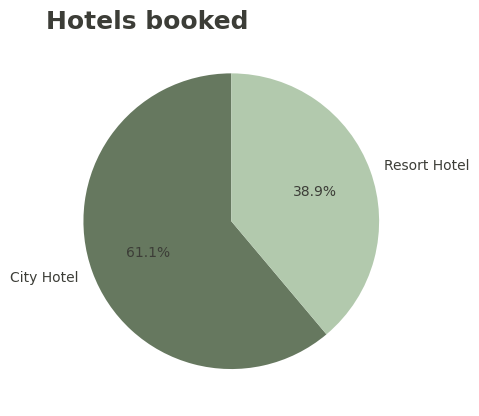

In [23]:
hotel_counts = hotel_booking_data['hotel'].value_counts()

plt.figure(figsize=(16, 8))

fig, ax = plt.subplots(1)
ax.pie(hotel_counts, labels=hotel_counts.index,
             startangle=90, autopct='%1.1f%%',
             colors = ['#66785F', '#B2C9AD'],
             textprops ={'color': "#3C3D37"} 
             )

ax.set_title(
    "Hotels booked",
    weight="bold",
    color="#3C3D37",
    fontsize=18,
    loc="left",
)


plt.show()

### Q2- What percentage of bookings were cancelled?

We examined the cancellation rates of bookings, and according to the results, approximately one-quarter of the bookings were canceled, which seems to be a high number.

<Figure size 1600x800 with 0 Axes>

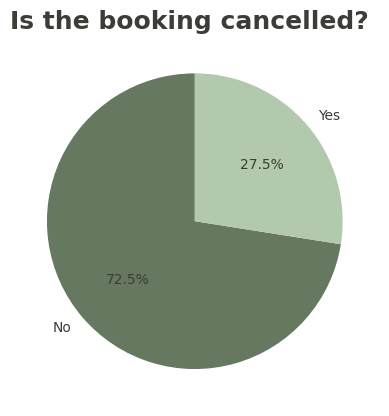

In [24]:
canceled_counts = hotel_booking_data['is_canceled'].value_counts()

plt.figure(figsize=(16, 8))

fig, ax = plt.subplots(1)
ax.pie(canceled_counts, labels=['No', 'Yes'],
             startangle=90, autopct='%1.1f%%',
             colors = ['#66785F', '#B2C9AD'],
             textprops ={'color': "#3C3D37"} 
             )

ax.set_title(
    "Is the booking cancelled?",
    weight="bold",
    color="#3C3D37",
    fontsize=18,
    loc="left",
)


plt.show()

### Q3- Based on different hotel types, what percentage of bookings were cancelled?

we examined the cancellation rates for each of the two hotel types. According to the results, the city hotel had a higher cancellation percentage, with 3 out of every 10 bookings being canceled.

C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\3837343385.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_by_hotel = hotel_booking_data.groupby('hotel')['is_canceled'].value_counts(normalize=True).unstack()


<Figure size 1600x800 with 0 Axes>

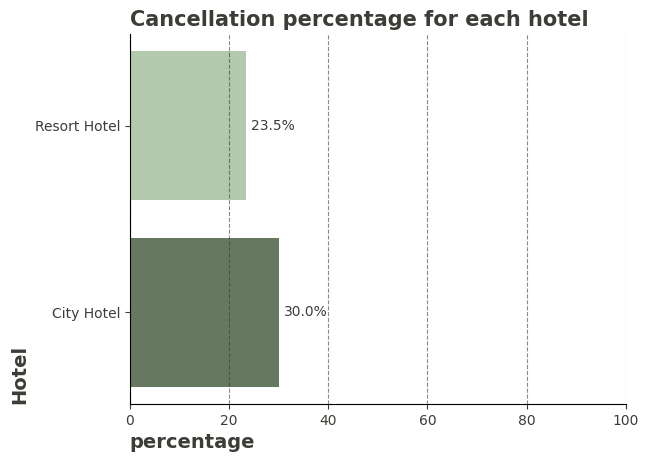

In [25]:
cancel_by_hotel = hotel_booking_data.groupby('hotel')['is_canceled'].value_counts(normalize=True).unstack()
cancel_percentage_by_hotel = cancel_by_hotel.loc[:, 1] * 100
cancel_percentage_by_hotel = cancel_percentage_by_hotel.sort_values(ascending=False)

plt.figure(figsize=(16, 8))

fig, ax = plt.subplots(1)
ax.barh(cancel_percentage_by_hotel.index, cancel_percentage_by_hotel.values, color=['#66785F', '#B2C9AD'], )

ax.set_title(
    "Cancellation percentage for each hotel",
    weight="bold",
    color="#3C3D37",
    fontsize=15,
    loc="left",
)
ax.set_xlabel(
    "percentage",
    loc="left",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)
ax.set_ylabel(
    "Hotel",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis='x', colors='#3C3D37')
ax.tick_params(axis='y', colors='#3C3D37')

ax.grid(axis='x', linestyle='--', alpha=0.6, color= '#3C3D37')
ax.set_xlim(0, 100)

for i, v in enumerate(cancel_percentage_by_hotel.values):
    ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10, color='#3C3D37')




### Q4-. In different years, what type of hotels were booked most and booked least? 

We divided the dataset based on hotels and booking years, and a significant increase in bookings in 2016 compared to the years before and after was noticeable. Additionally, the number of bookings for the city hotel was twice as high as for the resort hotel in 2016 and 2017, while both hotels had equal bookings in 2015. This could indicate a growing interest in city hotels.

C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\1566433861.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_book_year = hotel_booking_data.groupby(['arrival_date_year', 'hotel']).size().reset_index(name='count')


<Figure size 1600x800 with 0 Axes>

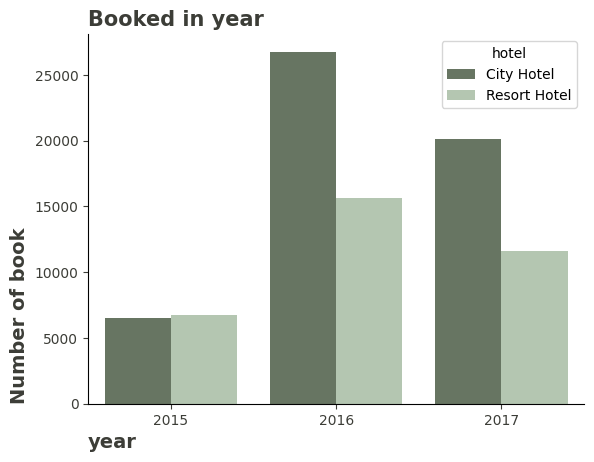

In [26]:
hotel_book_year = hotel_booking_data.groupby(['arrival_date_year', 'hotel']).size().reset_index(name='count')

plt.figure(figsize=(16, 8))

fig, ax = plt.subplots(1)

sns.barplot(x='arrival_date_year', y='count', hue='hotel', data=hotel_book_year, ax=ax, palette=['#66785F', '#B2C9AD'])

ax.set_title(
    "Booked in year",
    weight="bold",
    color="#3C3D37",
    fontsize=15,
    loc="left",
)
ax.set_xlabel(
    "year",
    loc="left",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)
ax.set_ylabel(
    "Number of book",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis='x', colors='#3C3D37')
ax.tick_params(axis='y', colors='#3C3D37')



### Q5-According to different hotel types, how ‘adr’ changes in different months?


We examined the data based on the daily cost of each hotel per month. According to the analysis, in the spring, fall, and winter seasons, the cost of the resort hotel is lower than that of the city hotel, but in the summer, the situation is the opposite. Additionally, in the early and late months of the year, the average cost for both hotels is lower than in other months.

C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\1422204844.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adr_monthly = hotel_booking_data.groupby(['arrival_date_month', 'hotel'])[
C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\1422204844.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(adr_monthly['arrival_date_month'].unique(), rotation=45)


<Figure size 1600x800 with 0 Axes>

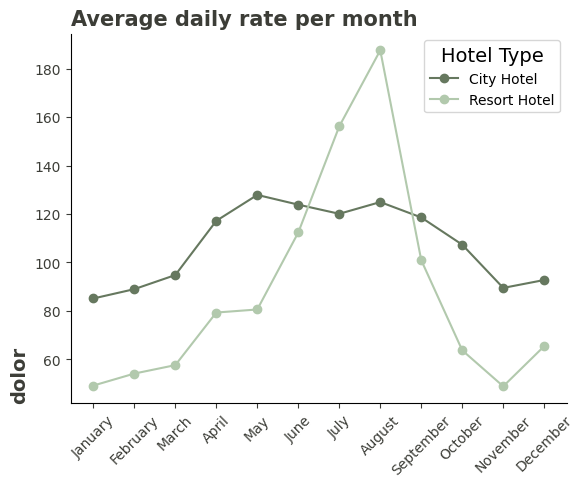

In [27]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}


adr_monthly = hotel_booking_data.groupby(['arrival_date_month', 'hotel'])[
    'adr'].mean().reset_index()
adr_monthly['month_number'] = adr_monthly['arrival_date_month'].map(month_map)
adr_monthly = adr_monthly.sort_values(['month_number', 'hotel']).drop(columns=['month_number'])


plt.figure(figsize=(16, 8))

fig, ax = plt.subplots(1)

colors = ['#66785F', '#B2C9AD']

for color, hotel_type in zip(colors, adr_monthly['hotel'].unique()):
    data = adr_monthly[adr_monthly['hotel'] == hotel_type]
    ax.plot(data['arrival_date_month'], data['adr'],
            label=hotel_type, color=color, marker='o')


ax.set_title(
    "Average daily rate per month",
    weight="bold",
    color="#3C3D37",
    fontsize=15,
    loc="left",
)

ax.set_ylabel(
    "dolor",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis='x', colors='#3C3D37')
ax.tick_params(axis='y', colors='#3C3D37')

ax.set_xticklabels(adr_monthly['arrival_date_month'].unique(), rotation=45)

ax.legend(title="Hotel Type", title_fontsize=14)

### Q6-Check hotel wise daily rates mean, standard deviation, median, min and max.

The daily rates of the hotels were examined (though outliers that distorted the analysis were disregarded). According to these analyses, the price ranges of the hotels are almost the same, but the city hotel rates are 10% higher. Additionally, the price variability is greater in the resort hotel.

In [28]:
hotel_adr_stats = hotel_booking_data.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])
hotel_adr_stats

C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\1490408123.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_adr_stats = hotel_booking_data.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])


,mean,std,median,min,max
hotel,,,,,
City Hotel,110.985944,48.062518,105.3,0.00,5400.0
Resort Hotel,99.025346,63.766782,79.5,-6.38,508.0


In [29]:
print((hotel_booking_data['adr'] < 0).sum())
print((hotel_booking_data['adr'] == 0).sum())

1
1778


In [30]:
hotel_adr = hotel_booking_data[hotel_booking_data['adr'] >= 0]
hotel_adr_stats = hotel_adr.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])
hotel_adr_stats

C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\1694060058.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_adr_stats = hotel_adr.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])


,mean,std,median,min,max
hotel,,,,,
City Hotel,110.985944,48.062518,105.3,0.0,5400.0
Resort Hotel,99.028449,63.765156,79.5,0.0,508.0


C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\2641993789.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hotel_adr, x='hotel', y='adr', palette='Set2')


<Figure size 1200x600 with 0 Axes>

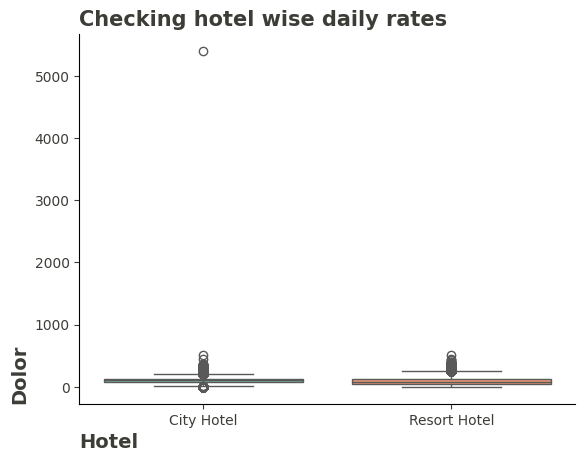

In [31]:
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1)
sns.boxplot(data=hotel_adr, x='hotel', y='adr', palette='Set2')

ax.set_title(
    "Checking hotel wise daily rates",
    weight="bold",
    color="#3C3D37",
    fontsize=15,
    loc="left",
)
ax.set_xlabel(
    "Hotel",
    loc="left",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)
ax.set_ylabel(
    "Dolor",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis='x', colors='#3C3D37')
ax.tick_params(axis='y', colors='#3C3D37')

In [32]:
hotel_adr = hotel_adr[hotel_adr['adr'] != hotel_adr['adr'].max()]
hotel_adr_stats = hotel_adr.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])
hotel_adr_stats

C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\2799014409.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_adr_stats = hotel_adr.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])


,mean,std,median,min,max
hotel,,,,,
City Hotel,110.886949,42.266328,105.3,0.0,510.0
Resort Hotel,99.028449,63.765156,79.5,0.0,508.0


C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\3217822902.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hotel_adr, x='hotel', y='adr', ax=ax, palette=['#66785F', '#B2C9AD'])


<Figure size 1200x600 with 0 Axes>

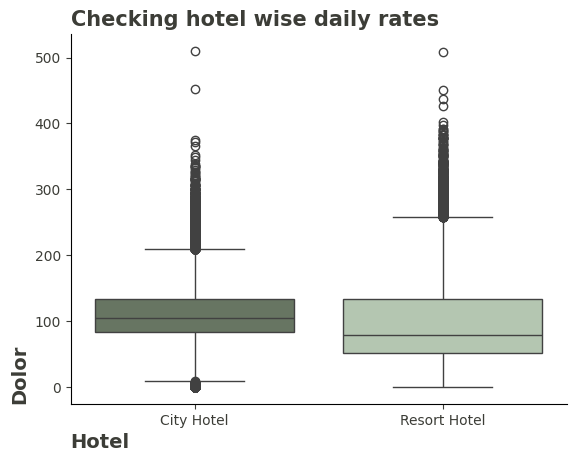

In [33]:
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1)

sns.boxplot(data=hotel_adr, x='hotel', y='adr', ax=ax, palette=['#66785F', '#B2C9AD'])

ax.set_title(
    "Checking hotel wise daily rates",
    weight="bold",
    color="#3C3D37",
    fontsize=15,
    loc="left",
)
ax.set_xlabel(
    "Hotel",
    loc="left",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)
ax.set_ylabel(
    "Dolor",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis='x', colors='#3C3D37')
ax.tick_params(axis='y', colors='#3C3D37')

In [34]:
hotel_adr = hotel_booking_data[hotel_booking_data['adr'] > 0]
hotel_adr_stats = hotel_adr.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])
hotel_adr = hotel_adr[hotel_adr['adr'] != hotel_adr['adr'].max()]
hotel_adr_stats = hotel_adr.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])
hotel_adr_stats

C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\2982431737.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_adr_stats = hotel_adr.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])
C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\2982431737.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_adr_stats = hotel_adr.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])


,mean,std,median,min,max
hotel,,,,,
City Hotel,113.168234,39.560358,106.25,0.50,510.0
Resort Hotel,101.115233,62.774730,80.10,0.26,508.0


C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\3217822902.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hotel_adr, x='hotel', y='adr', ax=ax, palette=['#66785F', '#B2C9AD'])


<Figure size 1200x600 with 0 Axes>

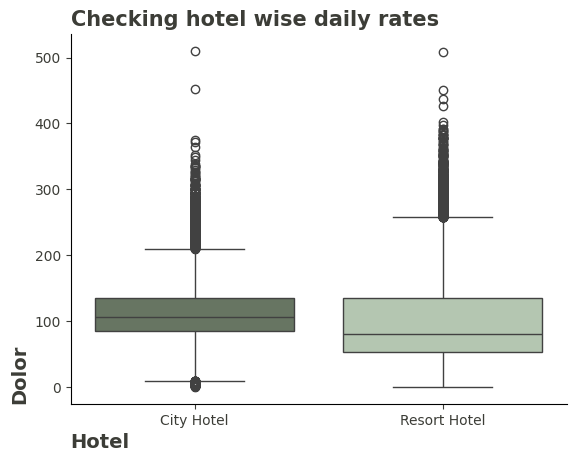

In [35]:
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1)

sns.boxplot(data=hotel_adr, x='hotel', y='adr', ax=ax, palette=['#66785F', '#B2C9AD'])

ax.set_title(
    "Checking hotel wise daily rates",
    weight="bold",
    color="#3C3D37",
    fontsize=15,
    loc="left",
)
ax.set_xlabel(
    "Hotel",
    loc="left",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)
ax.set_ylabel(
    "Dolor",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis='x', colors='#3C3D37')
ax.tick_params(axis='y', colors='#3C3D37')

### Q7-Extract the number of bookings per country and investigate that most of the guests are from which countries?


The booking data for each country was also analyzed, and according to this analysis, Portugal had the largest share, with nearly three times the number of bookings compared to the second and third countries.

<Figure size 1200x600 with 0 Axes>

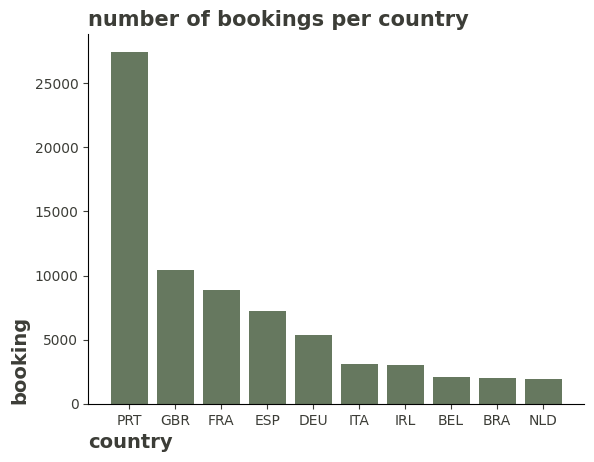

In [36]:
bookings_per_country = hotel_booking_data.groupby('country').size().reset_index(name='number of booking').sort_values(by='number of booking', ascending=False)
top_countries = bookings_per_country.head(10)
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1)
ax.bar(top_countries['country'], top_countries['number of booking'], color='#66785F')

ax.set_title(
    "number of bookings per country",
    weight="bold",
    color="#3C3D37",
    fontsize=15,
    loc="left",
)
ax.set_xlabel(
    "country",
    loc="left",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)
ax.set_ylabel(
    "booking",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="#3C3D37",
)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis='x', colors='#3C3D37')
ax.tick_params(axis='y', colors='#3C3D37')


### Q8- According to the ‘market_segment’ most of the guests book their rooms on what channels?

According to the market segment, most users make their bookings through online travel agents (OTA).

In [37]:
hotel_booking_data.groupby('market_segment').size().sort_values(ascending=False).reset_index(name='amount')

C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\2899606705.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_booking_data.groupby('market_segment').size().sort_values(ascending=False).reset_index(name='amount')


,market_segment,amount
0,Online TA,51618
1,Offline TA/TO,13889
2,Direct,11804
3,Groups,4942
4,Corporate,4212
5,Complementary,702
6,Aviation,227
7,Undefined,2


### Q9

According to the results from the agent analysis for hotel bookings, there is a specific agent for each hotel type that holds the largest share of bookings. After that, most bookings have been made without an agent.

In [38]:
hotel_booking_data.groupby(['hotel', 'agent']).size()\
    .reset_index(name='count')\
        .sort_values(['hotel', 'count'], ascending=[True, False]).groupby('hotel').head(5)\
            .reset_index(drop=True)

C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\407759644.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_booking_data.groupby(['hotel', 'agent']).size()\
C:\Users\eftekhari\AppData\Local\Temp\ipykernel_7296\407759644.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .sort_values(['hotel', 'count'], ascending=[True, False]).groupby('hotel').head(5)\


,hotel,agent,count
0,City Hotel,9,28753
1,City Hotel,-1,5587
2,City Hotel,14,3349
3,City Hotel,7,3300
4,City Hotel,28,1502
5,Resort Hotel,240,13020
6,Resort Hotel,-1,6606
7,Resort Hotel,250,2778
8,Resort Hotel,241,1644
9,Resort Hotel,40,954
